# Fashion Retail Intelligence: Return Prediction

* **Business Objective**: Use data analytics and machine learning to minimize return rates, optimize pricing, and drive informed decision-making across product categories and seasons.


## 1. Tools & Libraries Used
* Python
* Pandas
* Numpy
* Matplotlib
* Seaborn
* Jupyter Notebook

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('fashion_boutique.csv')

## 2. Exploratory Data Analysis

In [3]:
df.head()

,product_id,category,brand,season,size,color,original_price,markdown_percentage,current_price,purchase_date,stock_quantity,customer_rating,is_returned,return_reason
0,FB000001,Outerwear,Zara,Spring,XL,Red,196.01,0.0,196.01,2025-07-05,37,3.0,False,NaN
1,FB000002,Tops,Uniqlo,Winter,L,Pink,119.64,0.0,119.64,2025-08-06,2,2.5,False,NaN
2,FB000003,Accessories,Uniqlo,Winter,NaN,Black,33.80,0.0,33.80,2025-08-06,22,4.3,False,NaN
3,FB000004,Shoes,Uniqlo,Spring,XL,Black,75.36,0.0,75.36,2025-07-07,48,2.6,False,NaN
4,FB000005,Tops,Banana Republic,Winter,XL,Black,105.02,0.0,105.02,2025-08-06,10,NaN,False,NaN


In [4]:
df.dtypes

product_id              object
category                object
brand                   object
season                  object
size                    object
color                   object
original_price         float64
markdown_percentage    float64
current_price          float64
purchase_date           object
stock_quantity           int64
customer_rating        float64
is_returned               bool
return_reason           object
dtype: object

In [5]:
# Converting column of purchase date to datetime format

df['purchase_date'] = pd.to_datetime(df['purchase_date'])

In [6]:
df.dtypes

product_id                     object
category                       object
brand                          object
season                         object
size                           object
color                          object
original_price                float64
markdown_percentage           float64
current_price                 float64
purchase_date          datetime64[ns]
stock_quantity                  int64
customer_rating               float64
is_returned                      bool
return_reason                  object
dtype: object

In [7]:
df.isnull().sum()

product_id                0
category                  0
brand                     0
season                    0
size                    491
color                     0
original_price            0
markdown_percentage       0
current_price             0
purchase_date             0
stock_quantity            0
customer_rating         362
is_returned               0
return_reason          1856
dtype: int64

In [42]:
print(df.shape)
print(df.size)

(2176, 15)
32640


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   product_id           2176 non-null   object        
 1   category             2176 non-null   object        
 2   brand                2176 non-null   object        
 3   season               2176 non-null   object        
 4   size                 1685 non-null   object        
 5   color                2176 non-null   object        
 6   original_price       2176 non-null   float64       
 7   markdown_percentage  2176 non-null   float64       
 8   current_price        2176 non-null   float64       
 9   purchase_date        2176 non-null   datetime64[ns]
 10  stock_quantity       2176 non-null   int64         
 11  customer_rating      1814 non-null   float64       
 12  is_returned          2176 non-null   bool          
 13  return_reason        320 non-null

In [8]:
# Displaying unique categories in the dataset

df['category'].unique()

array(['Outerwear', 'Tops', 'Accessories', 'Shoes', 'Bottoms', 'Dresses'],
      dtype=object)

In [9]:
# Displaying unique brands in the dataset

df['brand'].unique()

array(['Zara', 'Uniqlo', 'Banana Republic', 'Mango', 'H&M', 'Ann Taylor',
       'Gap', 'Forever21'], dtype=object)

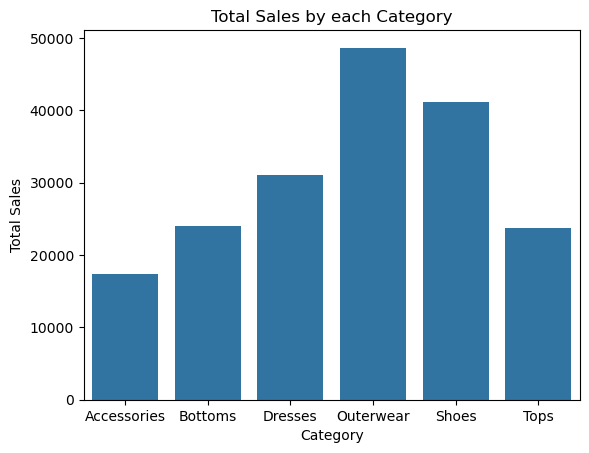

In [10]:
# Top selling products

top_category = df.groupby('category')['current_price'].sum().reset_index(name = 'Total_Sales')
sns.barplot(x='category', y='Total_Sales', data=top_category)
plot.title('Total Sales by each Category')
plot.xlabel('Category')
plot.ylabel('Total Sales')
plot.show()

C:\Users\Win10\AppData\Local\Temp\ipykernel_13928\600917242.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='current_price', data=df, palette='Set2')


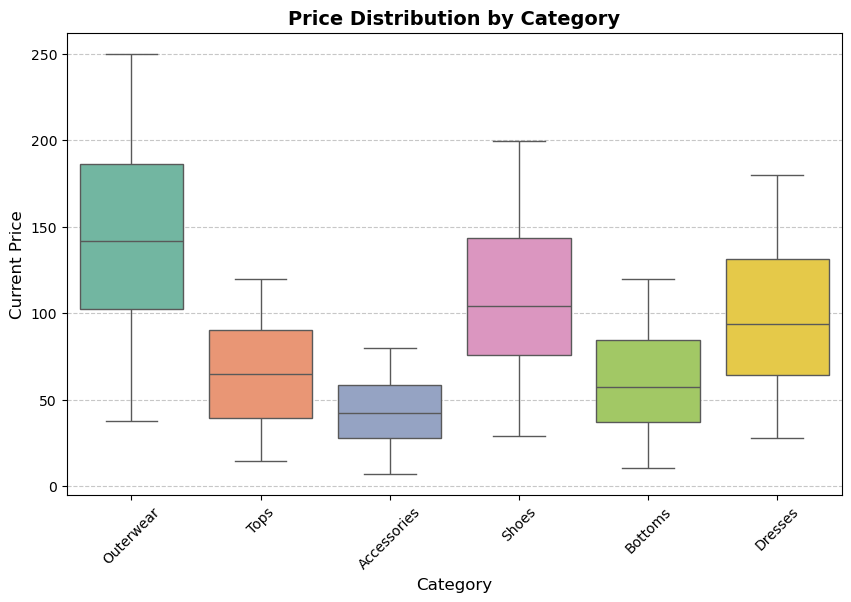

In [33]:
plot.figure(figsize=(10, 6))
sns.boxplot(x='category', y='current_price', data=df, palette='Set2')

plot.title('Price Distribution by Category', fontsize=14, fontweight='bold')
plot.xlabel('Category', fontsize=12)
plot.ylabel('Current Price', fontsize=12)
plot.xticks(rotation=45)
plot.grid(axis='y', linestyle='--', alpha=0.7)
plot.show()

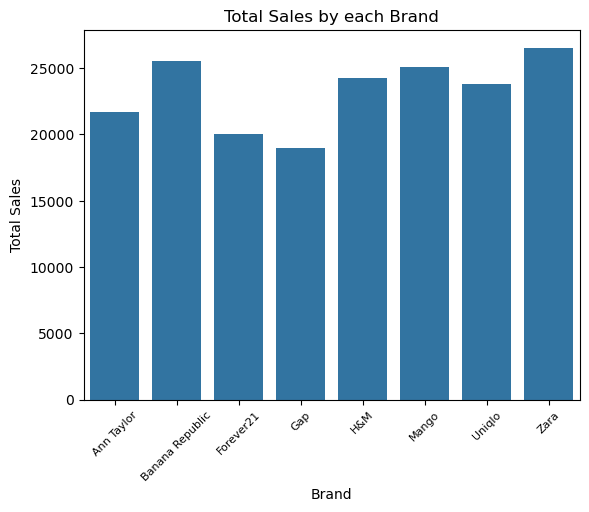

In [11]:
# Total sales according to each brand

top_category = df.groupby('brand')['current_price'].sum().reset_index(name = 'Total_Sales')
sns.barplot(x='brand', y='Total_Sales', data=top_category)
plot.title('Total Sales by each Brand')
plot.xlabel('Brand')
plot.ylabel('Total Sales')
plot.xticks(fontsize=8, rotation=45)
plot.show()

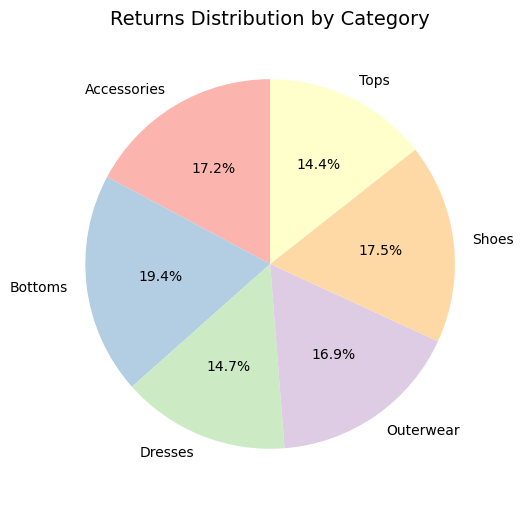

In [12]:
# Distribution of return rate of each category

return_df = df[df['is_returned'] == True]
returnCategory_df = return_df.groupby('category')['is_returned'].value_counts().reset_index(name = 'Count')

plot.figure(figsize=(6,6))
plot.pie(returnCategory_df['Count'], 
        labels=returnCategory_df['category'], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=plot.cm.Pastel1.colors)

plot.title('Returns Distribution by Category', fontsize=14)
plot.show()

### Insights:
* Bottoms have the highest return rate (19.4%), followed by Shoes (17.5%) and Accessories (17.2%).
* These categories may require quality checks, sizing reviews, or better product descriptions to reduce returns.

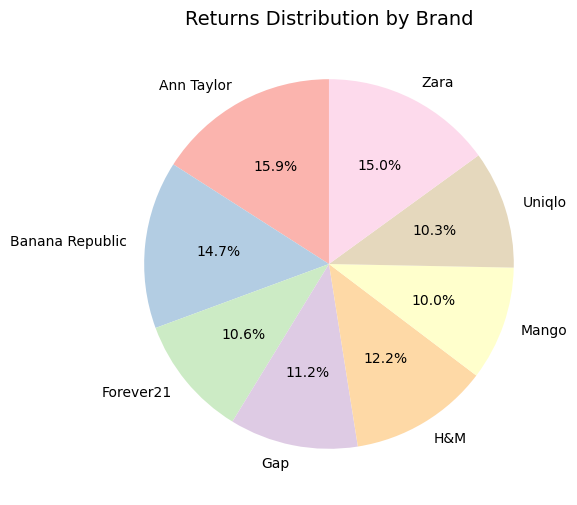

In [25]:
# Distribution of return rate of each brand

return_df = df[df['is_returned'] == True]
returnBrand_df = return_df.groupby('brand')['is_returned'].value_counts().reset_index(name = 'Count')

plot.figure(figsize=(6,6))
plot.pie(returnBrand_df['Count'], 
        labels=returnBrand_df['brand'], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=plot.cm.Pastel1.colors)

plot.title('Returns Distribution by Brand', fontsize=14)
plot.show()

### Insights:
* Ann Taylor has the highest return rate at 15.9%, followed closely by Zara (15%) and Banana Republic (14.7%).
* Given the strong reputation and quality of these brands, such high return rates are unusual. A likely reason could be sizing issues, which may be causing customers to send items back.

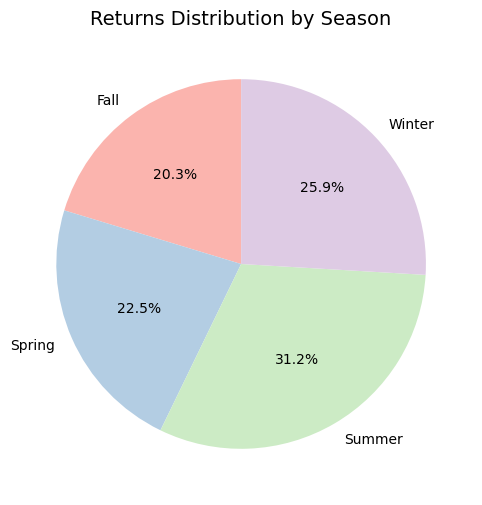

In [29]:
# Distribution of return rate of each season

return_df = df[df['is_returned'] == True]
returnSeason_df = return_df.groupby('season')['is_returned'].value_counts().reset_index(name = 'Count')

plot.figure(figsize=(6,6))
plot.pie(returnSeason_df['Count'], 
        labels=returnSeason_df['season'], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=plot.cm.Pastel1.colors)

plot.title('Returns Distribution by Season', fontsize=14)
plot.show()

### Insights:
* The highest return rate was recorded in Summer (31.2%), followed by Winter (25.9%) and Spring (22.5%).
* The spike in summer returns could be due to customers purchasing more items for the new academic year or vacations, leading to more frequent size and style mismatches.

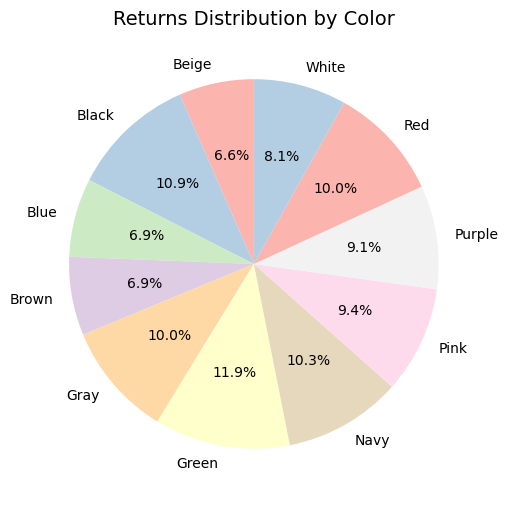

In [39]:
# Return distribution by color

return_df = df[df['is_returned'] == True]
returnColor_df = return_df.groupby('color')['is_returned'].value_counts().reset_index(name = 'Count')

plot.figure(figsize=(6,6))
plot.pie(returnColor_df['Count'], 
        labels=returnColor_df['color'], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=plot.cm.Pastel1.colors)

plot.title('Returns Distribution by Color', fontsize=14)
plot.show()

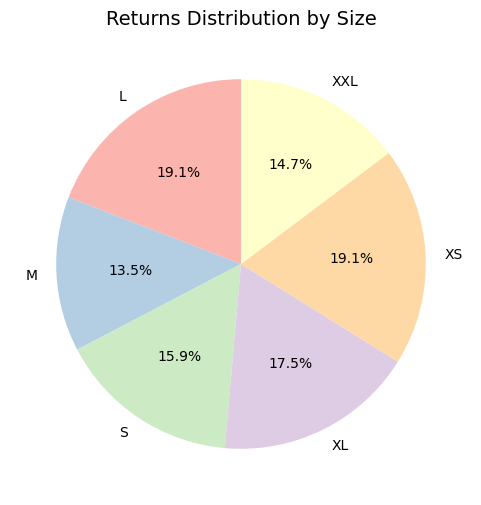

In [41]:
# Return distribution by size

return_df = df[df['is_returned'] == True]
returnSize_df = return_df.groupby('size')['is_returned'].value_counts().reset_index(name = 'Count')

plot.figure(figsize=(6,6))
plot.pie(returnSize_df['Count'], 
        labels=returnSize_df['size'], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=plot.cm.Pastel1.colors)

plot.title('Returns Distribution by Size', fontsize=14)
plot.show()

C:\Users\Win10\AppData\Local\Temp\ipykernel_17960\2850511205.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='product_id', y='Total Sales', data=top_products, palette='Blues_r')
C:\Users\Win10\AppData\Local\Temp\ipykernel_17960\2850511205.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='product_id', y='Count', data=top_returned, palette='Reds_r')


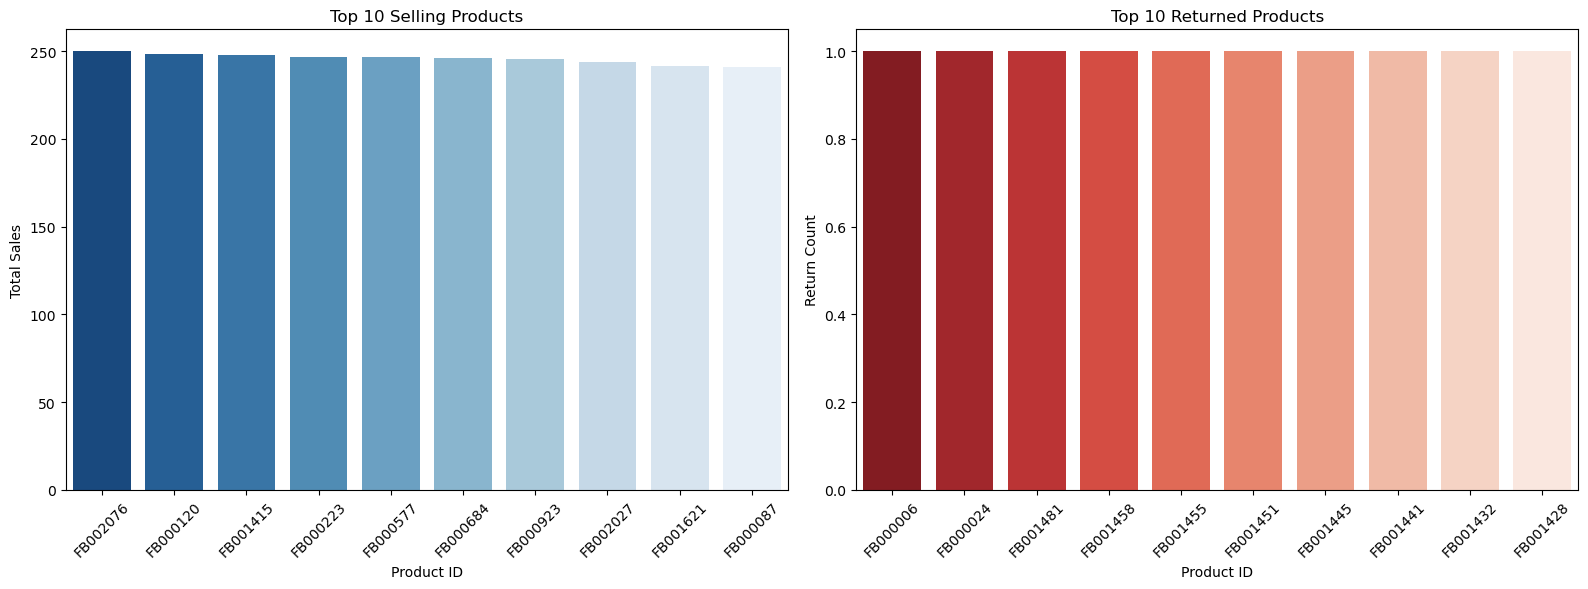

In [13]:
# Get top selling products
top_products = df.groupby('product_id')['current_price'].sum().reset_index(name='Total Sales')
top_products = top_products.sort_values(by='Total Sales', ascending=False).head(10)

# Get top returned products
returnProduct_df = return_df.groupby('product_id')['is_returned'].value_counts().reset_index(name='Count')
top_returned = returnProduct_df.sort_values(by='Count', ascending=False).head(10)

# Plotting
fig, axes = plot.subplots(1, 2, figsize=(16,6))

# Top Selling Products
sns.barplot(ax=axes[0], x='product_id', y='Total Sales', data=top_products, palette='Blues_r')
axes[0].set_title('Top 10 Selling Products')
axes[0].set_xlabel('Product ID')
axes[0].set_ylabel('Total Sales')
axes[0].tick_params(axis='x', rotation=45)

# Top Returned Products
sns.barplot(ax=axes[1], x='product_id', y='Count', data=top_returned, palette='Reds_r')
axes[1].set_title('Top 10 Returned Products')
axes[1].set_xlabel('Product ID')
axes[1].set_ylabel('Return Count')
axes[1].tick_params(axis='x', rotation=45)

plot.tight_layout()
plot.show()

C:\Users\Win10\AppData\Local\Temp\ipykernel_17960\3227437916.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


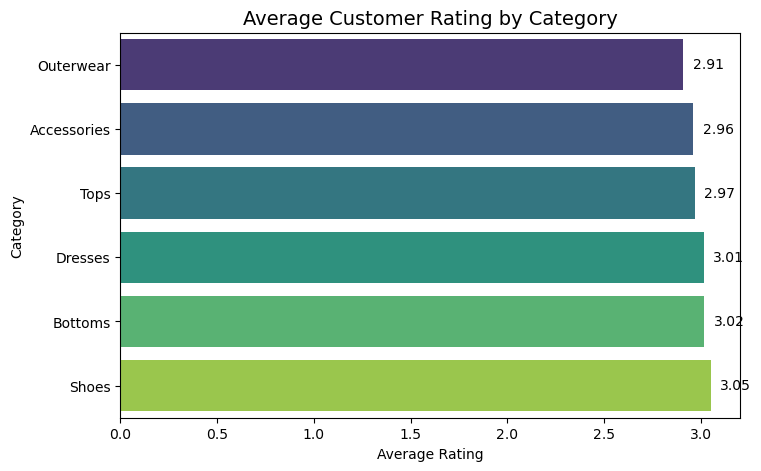

In [30]:
# Top Rated Categories

highratedCategory = df.groupby('category')['customer_rating'].mean().reset_index()
highratedCategory = highratedCategory.sort_values(by='customer_rating', ascending=True)

plot.figure(figsize=(8, 5))
sns.barplot(
    x='customer_rating',
    y='category',
    data=highratedCategory,
    palette='viridis'
)
plot.title('Average Customer Rating by Category', fontsize=14)
plot.xlabel('Average Rating')
plot.ylabel('Category')

for i, v in enumerate(highratedCategory['customer_rating']):
    plot.text(v + 0.05, i, f"{v:.2f}", va='center')

plot.show()

### Insights:
* Shoes received the highest average customer rating (3.05), followed closely by Bottoms (3.02) and Dresses (3.01).
* Outerwear, Accessories, and Tops had average ratings below 3, suggesting potential issues that need to be investigated—such as quality, sizing, or design preferences.

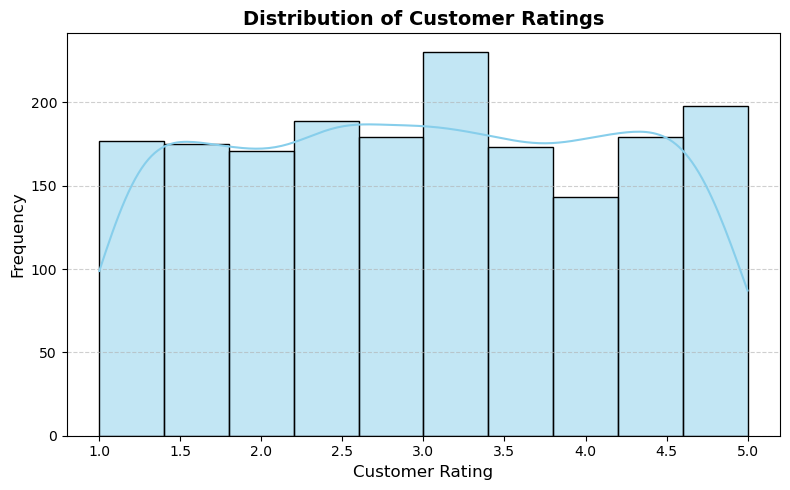

In [32]:
# Rating distribution

plot.figure(figsize=(8, 5))
sns.histplot(
    x='customer_rating', 
    data=df, 
    bins=10,                
    kde=True,               
    color='skyblue',      
    edgecolor='black'      
)
plot.title('Distribution of Customer Ratings', fontsize=14, fontweight='bold')
plot.xlabel('Customer Rating', fontsize=12)
plot.ylabel('Frequency', fontsize=12)
plot.grid(axis='y', linestyle='--', alpha=0.6)  
plot.tight_layout()
plot.show()

### Insights:
* Overall, customer ratings are spread out quite evenly, with the highest concentration between 3.0 and 3.5.
* There’s also a noticeable second peak between 4.5 and 5.0, suggesting that some categories received excellent feedback from customers.

In [14]:
df.head()

,product_id,category,brand,season,size,color,original_price,markdown_percentage,current_price,purchase_date,stock_quantity,customer_rating,is_returned,return_reason
0,FB000001,Outerwear,Zara,Spring,XL,Red,196.01,0.0,196.01,2025-07-05,37,3.0,False,NaN
1,FB000002,Tops,Uniqlo,Winter,L,Pink,119.64,0.0,119.64,2025-08-06,2,2.5,False,NaN
2,FB000003,Accessories,Uniqlo,Winter,NaN,Black,33.80,0.0,33.80,2025-08-06,22,4.3,False,NaN
3,FB000004,Shoes,Uniqlo,Spring,XL,Black,75.36,0.0,75.36,2025-07-07,48,2.6,False,NaN
4,FB000005,Tops,Banana Republic,Winter,XL,Black,105.02,0.0,105.02,2025-08-06,10,NaN,False,NaN


<Axes: xlabel='current_price', ylabel='customer_rating'>

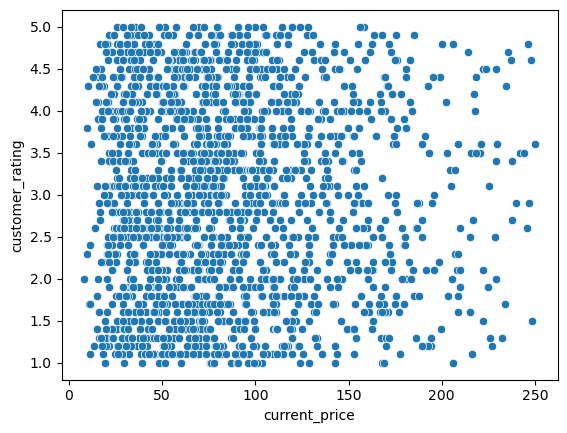

In [15]:
# Understanding relationship between current_price and customer_rating

sns.scatterplot(x='current_price',y='customer_rating', data=df)

### Insights:
* Customer ratings do not strongly depend on the product price as high and low ratings are spread across all price ranges.
* This suggests that factors other than price (e.g., quality, fit, delivery experience) are influencing customer satisfaction.

<Axes: title={'center': 'Monthly Sales'}, xlabel='Month', ylabel='Sales'>

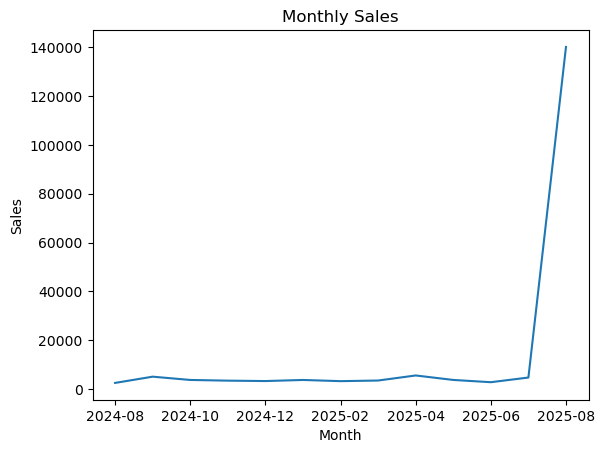

In [17]:
# Observing monthly sales trends

df['purchase_month'] = df['purchase_date'].dt.to_period('M').astype(str)

purchase_trend = df.groupby('purchase_month')['current_price'].sum()
purchase_trend.plot(kind='line', title='Monthly Sales', xlabel='Month', ylabel='Sales')

### Insights:
* Sales have been relatively stable for most months but spiked significantly in the latest month.
* The spike could be due to seasonal promotions, product launches or other marketing activities worth investigating to replicate this success.

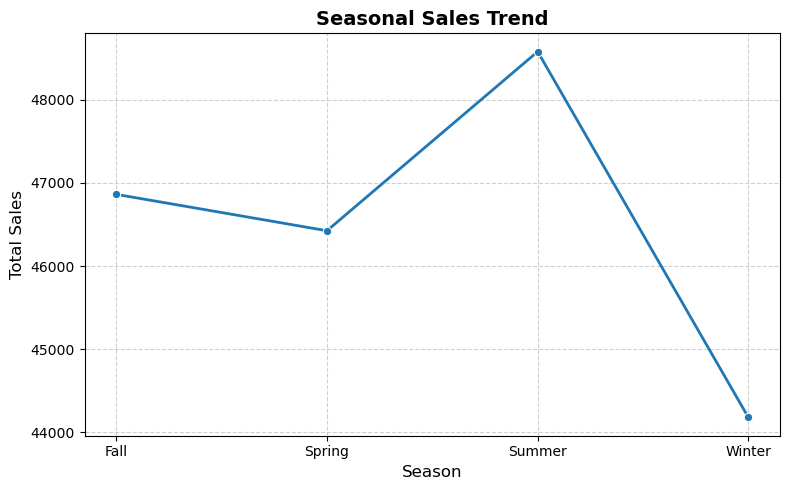

C:\Users\Win10\AppData\Local\Temp\ipykernel_17960\3750964384.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seasonDistribution, x='season', y='Total Sales', palette='viridis')


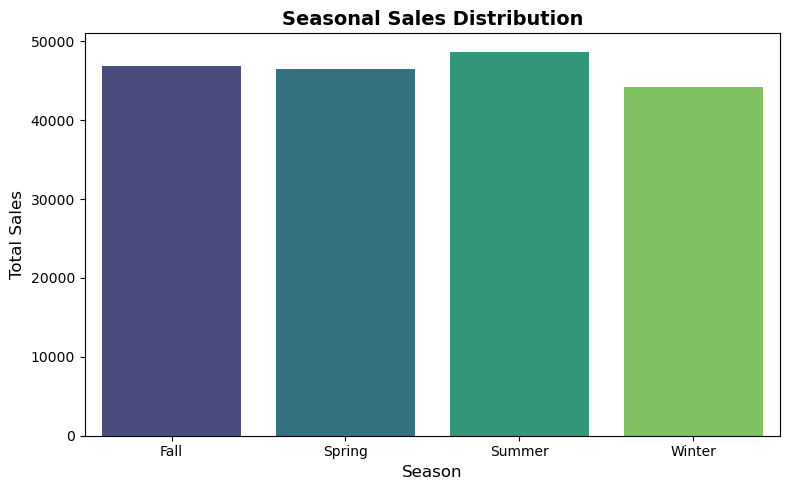

In [23]:
# Analyzing sales performance during each season

seasonDistribution = df.groupby('season')['current_price'].sum().reset_index(name='Total Sales')


plot.figure(figsize=(8,5))
sns.lineplot(data=seasonDistribution, x='season', y='Total Sales', marker='o', linewidth=2)
plot.title('Seasonal Sales Trend', fontsize=14, fontweight='bold')
plot.xlabel('Season', fontsize=12)
plot.ylabel('Total Sales', fontsize=12)
plot.grid(True, linestyle='--', alpha=0.6)
plot.tight_layout()
plot.show()


plot.figure(figsize=(8,5))
sns.barplot(data=seasonDistribution, x='season', y='Total Sales', palette='viridis')
plot.title('Seasonal Sales Distribution', fontsize=14, fontweight='bold')
plot.xlabel('Season', fontsize=12)
plot.ylabel('Total Sales', fontsize=12)
plot.tight_layout()
plot.show()

### Insights:
* Sales remain relatively consistent across all seasons, with only minor fluctuations.
* The highest sales are observed during the Summer season. A possible reason could be parents purchasing new clothes for children at the start of a new academic year. Further analysis is recommended to confirm the factors driving this seasonal spike.
* The Winter season shows the lowest sales, indicating potential opportunities for targeted promotions or seasonal marketing campaigns.

In [33]:
df.head()

,product_id,category,brand,season,size,color,original_price,markdown_percentage,current_price,purchase_date,stock_quantity,customer_rating,is_returned,return_reason,purchase_month
0,FB000001,Outerwear,Zara,Spring,XL,Red,196.01,0.0,196.01,2025-07-05,37,3.0,False,NaN,2025-07
1,FB000002,Tops,Uniqlo,Winter,L,Pink,119.64,0.0,119.64,2025-08-06,2,2.5,False,NaN,2025-08
2,FB000003,Accessories,Uniqlo,Winter,NaN,Black,33.80,0.0,33.80,2025-08-06,22,4.3,False,NaN,2025-08
3,FB000004,Shoes,Uniqlo,Spring,XL,Black,75.36,0.0,75.36,2025-07-07,48,2.6,False,NaN,2025-07
4,FB000005,Tops,Banana Republic,Winter,XL,Black,105.02,0.0,105.02,2025-08-06,10,NaN,False,NaN,2025-08


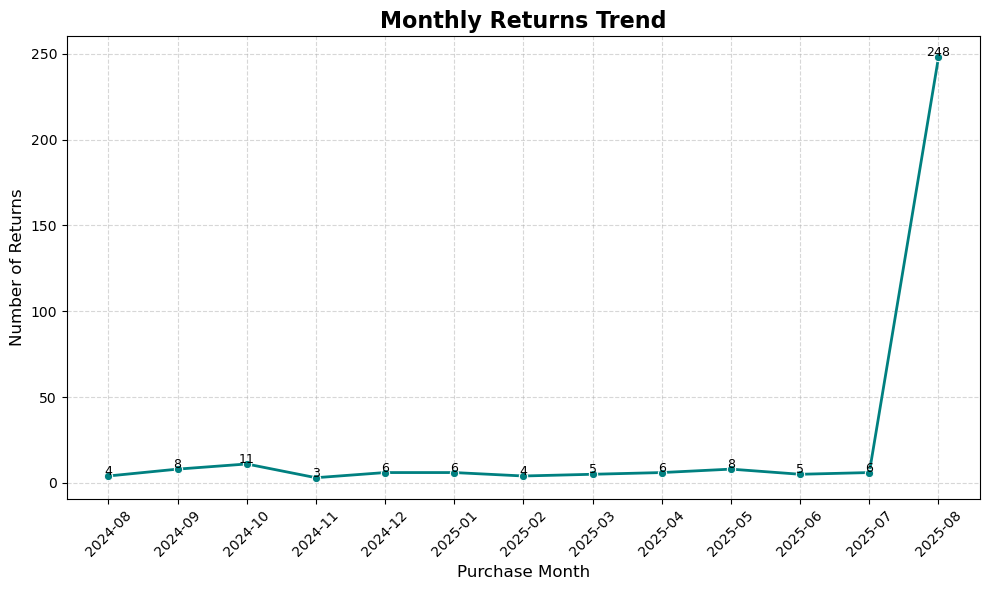

In [36]:
# Returns over time

return_df = df[df['is_returned'] == True]

returnTrend_df = return_df.groupby('purchase_month')['is_returned'].count().reset_index(name='Count')

plot.figure(figsize=(10, 6))
sns.lineplot(x='purchase_month', y='Count', data=returnTrend_df, marker='o', linewidth=2, color='teal')

plot.title('Monthly Returns Trend', fontsize=16, fontweight='bold')
plot.xlabel('Purchase Month', fontsize=12)
plot.ylabel('Number of Returns', fontsize=12)
plot.xticks(rotation=45)
plot.grid(visible=True, linestyle='--', alpha=0.5)

for x, y in zip(returnTrend_df['purchase_month'], returnTrend_df['Count']):
    plot.text(x, y+0.5, str(y), ha='center', fontsize=9)

plot.tight_layout()
plot.show()

### Insights:
* From August 2024 to July 2025, the number of returned items remained fairly stable and relatively low.
* In August 2025, returns suddenly spiked to 248 items which is a sharp and unusual increase.
* This spike could be linked to end-of-season clearance sales or large promotional events in July, where customers often buy more items at discounted prices but end up returning many due to impulse purchases, incorrect sizing or product expectations not being met.

### 3. Correlation Analysis

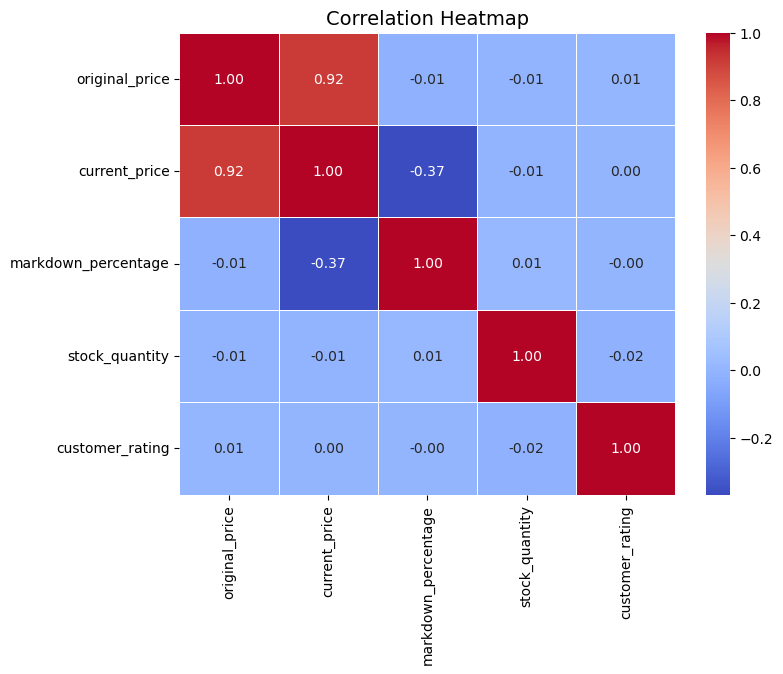

In [37]:
# Correlation Analysis

numeric_cols = ['original_price', 'current_price', 'markdown_percentage', 'stock_quantity', 'customer_rating']
corr_matrix = df[numeric_cols].corr()

plot.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plot.title('Correlation Heatmap', fontsize=14)
plot.show()

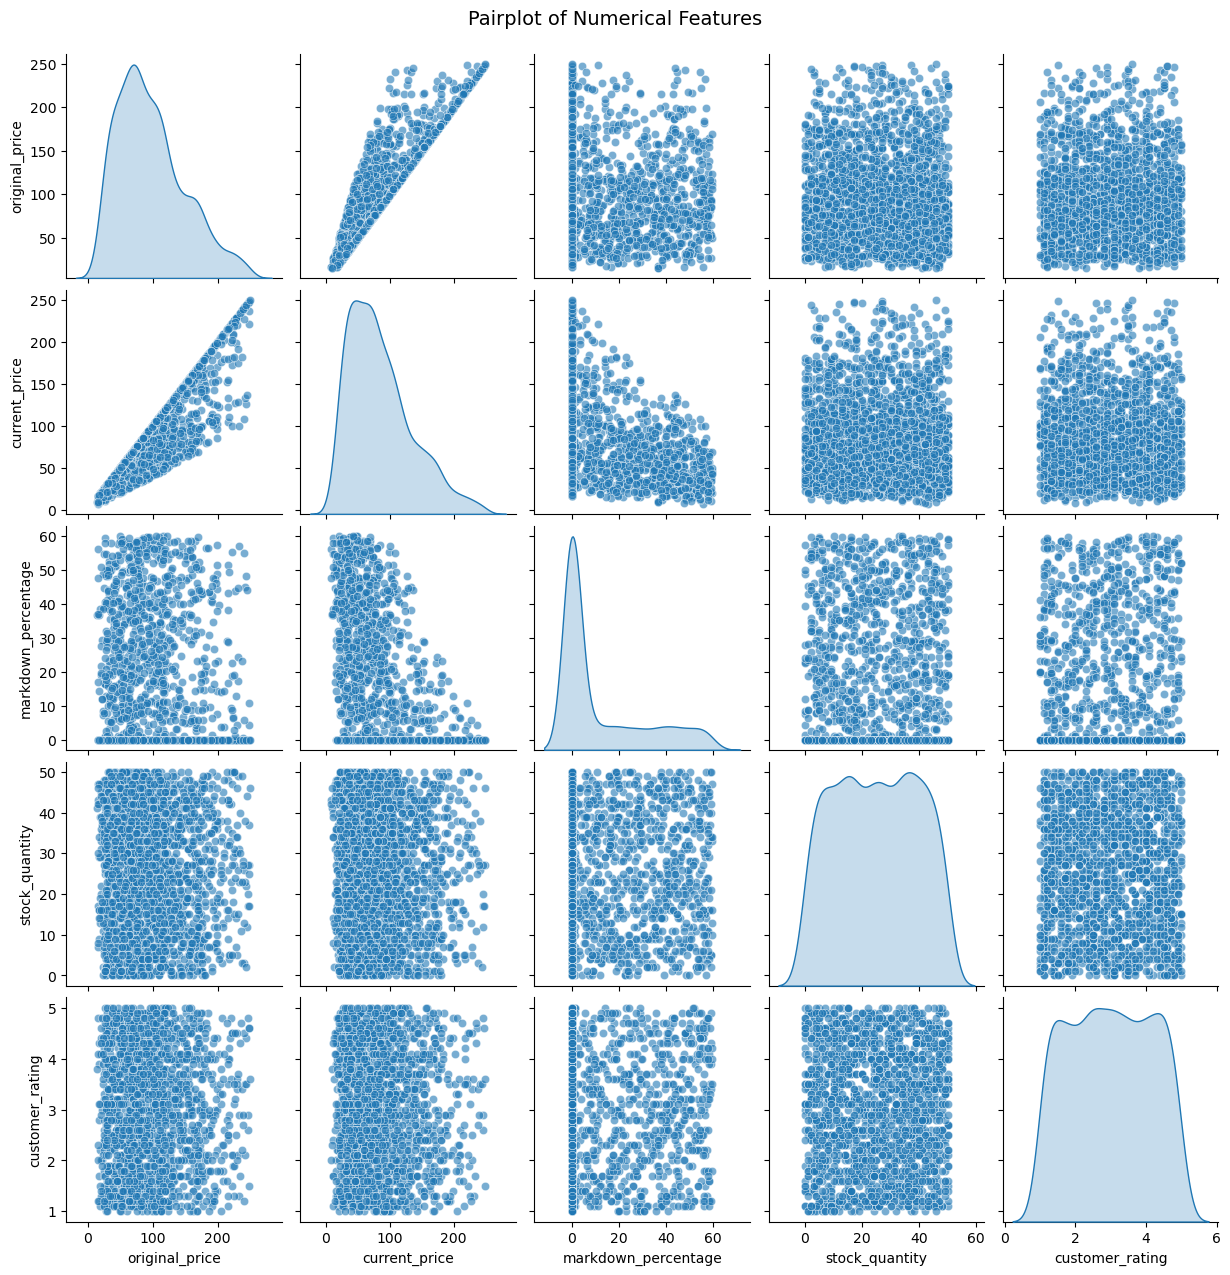

In [38]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(df[numeric_cols], diag_kind='kde', plot_kws={'alpha': 0.6})
plot.suptitle('Pairplot of Numerical Features', y=1.02, fontsize=14)
plot.show()

### Insights:
* There is a strong positive correlation between current price and original price — which makes sense because the current price is directly based on the original price after applying discounts or markdowns.
* We also see a clear negative correlation between current price and markdown percentage. This is expected as higher the discount given, lower the selling price becomes. In other words, bigger markdowns naturally drive prices down.

### 4. Model Building

* Since, our goal here is to predict whether a product will be returned (is_returned) based on category, price, seasonality and other important features, we would need to build a classification model.
* Our target variable `is_returned` is binary.
* In terms of features, we are proceeding with the following features for prediction and dropping the rest: `category`, `brand`, `season`, `size`,`original_price`, `markdown_percentage`, `stock_quantity`,`customer_rating`,`purchase_month`

In [57]:
df['is_returned'].value_counts(normalize=True)

is_returned
False    0.852941
True     0.147059
Name: proportion, dtype: float64

In [44]:
# Selecting relevant features

features = ['category', 'brand', 'season', 'size', 'original_price', 'markdown_percentage', 'stock_quantity', 'customer_rating', 'purchase_month']

target = 'is_returned'

X = df[features]
y = df[target]

# Separating categorical and numerical features
categorical_features = ['category', 'brand', 'season', 'size', 'purchase_month']
numerical_features = ['original_price', 'markdown_percentage', 'stock_quantity', 'customer_rating']

In [46]:
# preprocessing for categorical data

categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [47]:
# preprocessing for numerical data

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

In [48]:
# combining preprocessing

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

In [49]:
# defining the model

model = DecisionTreeClassifier(random_state=42)

In [50]:
# creating pipeline

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])


In [51]:
# splitting the data in the ratio of 80:20 for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# training the model

clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['category', 'brand',
                                                   'season', 'size',
                                                   'purchase_month']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['original_price',
                                                   'markdown_percentage',
                                                   'stock_quantity',
                                                   'customer_rating'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [54]:
# predict on test set

y_pred = clf.predict(X_test)

In [55]:
# evaluating the model 

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7454128440366973
Precision: 0.04411764705882353
Recall: 0.061224489795918366
F1 Score: 0.05128205128205128

Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.83      0.85       387
        True       0.04      0.06      0.05        49

    accuracy                           0.75       436
   macro avg       0.46      0.45      0.45       436
weighted avg       0.78      0.75      0.76       436


Confusion Matrix:
 [[322  65]
 [ 46   3]]


### Insights:
* The accuracy is 74.54% which looks okay but that's mostly because the model is predicting the majority class 'Not Returned' most of the time.
* The model is able to predict only 4% of the items as actualy returned.
* Only 49 returned items in the test set which indicates it's an extremely imbalanced target.
* As there is a class imbalance, the decision tree will always lean toward the majority class.

In [59]:
# We will fix the imbalance first before training the model again
# Importing SMOTE and applying to training data
# We can apply SMOTE on  the training set so the model doesn't see synthetic data during evaluation

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [62]:
# preprocessing with imputation and encoding

categorical_features = ['category', 'brand', 'season', 'size', 'purchase_month']
numerical_features = ['original_price', 'markdown_percentage', 'stock_quantity', 'customer_rating']

# Categorical: impute missing with most frequent, then one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Numerical: impute missing with median
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Combine into preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ]
)

# Encode + impute train & test
X_train_enc = preprocessor.fit_transform(X_train)
X_test_enc = preprocessor.transform(X_test)

In [63]:
# applying SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_enc, y_train)

print("Before SMOTE:", y_train.value_counts(normalize=True))
print("After SMOTE:", y_train_res.value_counts(normalize=True))

Before SMOTE: is_returned
False    0.852874
True     0.147126
Name: proportion, dtype: float64
After SMOTE: is_returned
False    0.5
True     0.5
Name: proportion, dtype: float64


In [64]:
# training decision tree on balanced data

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_res, y_train_res)

y_pred = clf.predict(X_test_enc)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.731651376146789
Precision: 0.136986301369863
Recall: 0.15625
F1 Score: 0.145985401459854

Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.83      0.84       372
        True       0.14      0.16      0.15        64

    accuracy                           0.73       436
   macro avg       0.49      0.49      0.49       436
weighted avg       0.75      0.73      0.74       436


Confusion Matrix:
 [[309  63]
 [ 54  10]]


### Insights:
* Recall for True improved to 16%.
* Precision for True also improved to 14%.
* Accuracy dropped slightly.
* SMOTE helped the model see more returned items but the Decision Tree on raw features can still struggle if the patterns aren't very distinct.

### Processing With Hypertuning

In [71]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Hyperparameter grid
param_grid = {
    'classifier__max_depth': [3, 5, 7, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__class_weight': [None, 'balanced']
}

# Grid search with F1 score
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

# Fit on original train data (SMOTE will only be applied to training folds)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score (CV):", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best Parameters: {'classifier__class_weight': None, 'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Best F1 Score (CV): 0.15395418424653806
Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.83      0.84       372
        True       0.16      0.19      0.17        64

    accuracy                           0.73       436
   macro avg       0.51      0.51      0.51       436
weighted avg       0.75      0.73      0.74       436

Confusion Matrix:
 [[307  65]
 [ 52  12]]


### Insights:
* After applying SMOTE and hypertuning the Decision Tree, the model got slightly better at identifying returned items (recall improved from ~16% to ~19%), but it’s still misclassifying most of them. This means the decision tree, even with tuning, isn’t capturing strong patterns in the features for predicting returns. We need a stronger model that can capture more complex relationships.
* So, proceeding further with Random Forest.

In [74]:
# Applying random forest while keeping the same preprocessing + SMOTE pipeline

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Hyperparameter grid for Random Forest
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__class_weight': [None, 'balanced']
}

# GridSearchCV setup
grid_search_rf = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid_rf,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Best parameters & CV score
print("Best Parameters (RF):", grid_search_rf.best_params_)
print("Best F1 Score (CV):", grid_search_rf.best_score_)

# Evaluate on test set
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Best Parameters (RF): {'classifier__class_weight': None, 'classifier__criterion': 'gini', 'classifier__max_depth': 20, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best F1 Score (CV): 0.05054758107389686

Classification Report:
               precision    recall  f1-score   support

       False       0.85      1.00      0.92       372
        True       0.00      0.00      0.00        64

    accuracy                           0.85       436
   macro avg       0.43      0.50      0.46       436
weighted avg       0.73      0.85      0.78       436

Confusion Matrix:
 [[371   1]
 [ 64   0]]


                     Feature  Importance
14          cat__season_Fall    0.181816
15        cat__season_Spring    0.145289
18               cat__size_L    0.082464
6      cat__brand_Ann Taylor    0.077893
37       num__original_price    0.077613
39       num__stock_quantity    0.064528
40      num__customer_rating    0.046338
38  num__markdown_percentage    0.043584
22              cat__size_XS    0.038237
13           cat__brand_Zara    0.029353


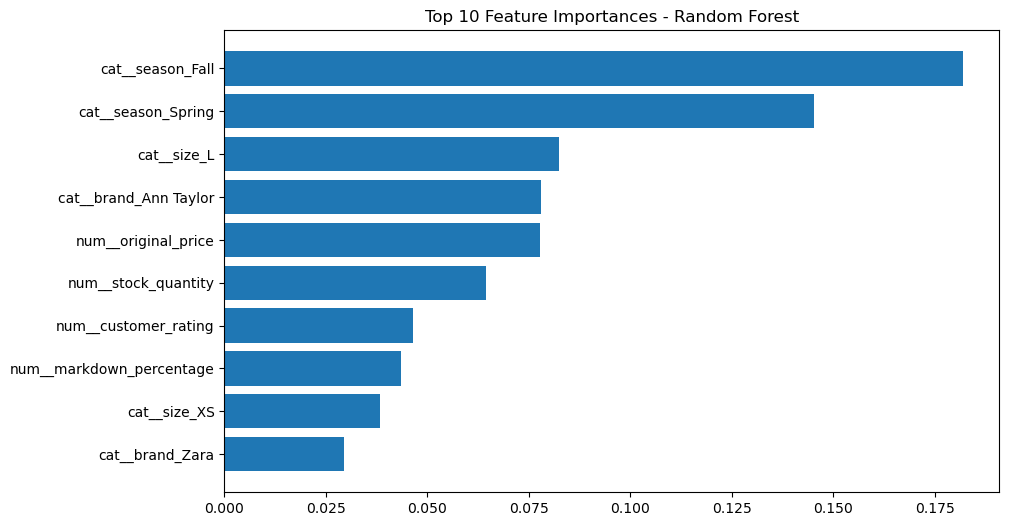

In [76]:
# finding the best features

fitted_preprocessor = grid_search.best_estimator_.named_steps["preprocessor"]

# Get feature names after transformation
feature_names = fitted_preprocessor.get_feature_names_out()

# Extract Random Forest model
rf_model = grid_search.best_estimator_.named_steps["classifier"]

# Get feature importances
importances = rf_model.feature_importances_

# Create DataFrame
feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Display top 10 features
print(feat_imp_df.head(10))

# Plot
plot.figure(figsize=(10, 6))
plot.barh(feat_imp_df["Feature"][:10], feat_imp_df["Importance"][:10])
plot.gca().invert_yaxis()
plot.title("Top 10 Feature Importances - Random Forest")
plot.show()

### Insights:
* We tested two machine learning models (Decision Tree and Random Forest) to predict whether a product will be returned based on its attributes like season, size, brand, price, and customer ratings.
* Findings:
* 1. The most important factors influencing returns were season (Fall, Spring), product size (L), and brand (Ann Taylor), followed by original price and stock quantity.
  2. Despite identifying these factors, the models were good at predicting non-returns but struggled to accurately detect items that would be returned.
  3. This means that while we understand some patterns in the data, returns are influenced by additional factors not captured here such as customer behavior, delivery experience or product quality issues after purchase.
* To improve prediction accuracy, we recommend collecting more detailed data, especially around post-purchase customer feedback, delivery timelines and historical return behavior. This will allow us to build a model that is more balanced in predicting both returns and non-returns.